# Model Selection 모듈 소개

## 학습/테스트 데이터 셋 분리 – train_test_split()

### 사이킷런 model_selection 모듈의 주요 기능
- 학습 데이터와 테스트 데이터 세트 분리
- 교차 검증 분할 및 평가
- Estimator의 하이퍼 파라미터 튜닝

### (1) 학습/테스트 데이터 셋 분리하지 않고 예측

In [3]:
# (1) 학습/테스트 데이터 셋 분리하지 않고 예측
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

train_data = iris_data.data
train_label = iris_data.target

# 학습 수행
dt_clf.fit(train_data, train_label)

# 테스트
pred = dt_clf.predict(train_data)
print(f'예측정확도 : {accuracy_score(train_label, pred)}')

예측정확도 : 1.0


* 예측을 train_data로 했기 때문에 1.0 (100%)으로 출력 (잘못됨)
* 예측은 테스트 데이터로 해야 함

### (2) 학습/테스트 데이터 셋 분리하고 예측

In [4]:
# (2) 학습/테스트 데이터 셋 분리하고 예측 

X = iris_data.data
y = iris_data.target

# 학습/테스트 분할 (split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 11)

In [5]:
# 학습 수행
dt_clf.fit(X_train, y_train)

# 예측 수행
pred = dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측정확도: 0.9111


넘파이 ndarray 뿐만 아니라, 판다스 DataFrame/Series도 train_test_split()으로 분할 가능

In [6]:
import pandas as pd

iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# 피처 데이터프레임 반환 (마지막 열 전까지, 마지막 열 제외)
feature_df = iris_df.iloc[:, :-1]

# 타깃 데이터프레임 반환
target_df = iris_df.iloc[:, -1]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size = 0.3, random_state=10)

In [8]:
df_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9778


## Data Split과 모델 검증

### 홀드-아웃 방식


부적합한 데이터 선별로 인한 문제점

* ML은 데이터에 기반하고, 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 ML에 영향을 미치는 다양한 요소를 가지고 있음
* 특정 ML 알고리즘에 최적으로 동작할 수 있도록 데이터를 선별햇 학습한다면 실제 데이터 양식과는 많은 차이가 있을 것이고, 결국 성능 저하로 이어질 것임

문제점 개선 --> 교차 검증을 이용해 더 다양한 학습 평가 수행

### 교차검증(Cross Validation, CV)

* k-ford Cross Validation이라고도 함.
* 전체 데이터 세트를 임의로 k개의 그룹으로 나누고, 그 가운데 하나의 그룹을 돌아가면서 테스트 데이터 세트로, 나머지 k-1개 그룹은 학습용 데이터 세트로 사용하는 방법
* 별도의 여러 세트로, 구성된 학습 데이터 세트와 검증된 데이터 세트에서 학습과 평가를 수행


* 사용 목적
    - 데이터에 적합한 알고리즘인지 평가하기 위해
    - 모델에 적합한 hyperparameter 찾기 위해
    - 과대적합 예방
    - 데이터 편중을 막기 위해

### 교차 검증 방법
- K 폴드 교차 검증
- Stratified K 폴드 교차 검증

### K 폴드 교차 검증

* K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
* 가장 보편적으로 사용되는 교차 검증 기법


* 5-폴드 교차 검증
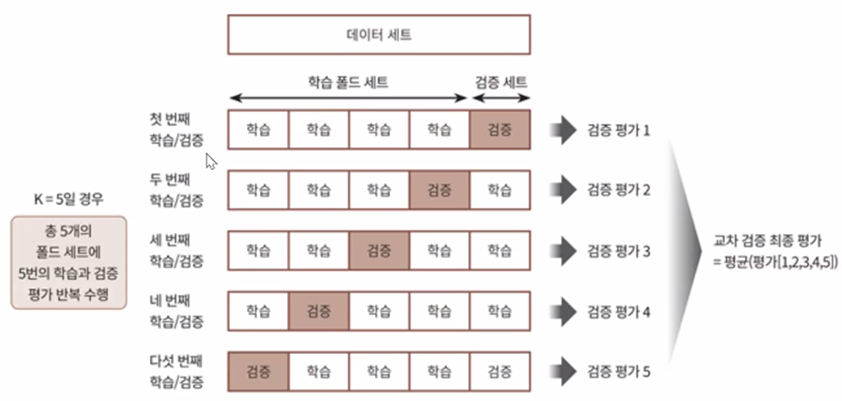

**K 폴드 교차 검증 프로세스 구현을 위한 사이킷런 클래스**

(1) KFold 클래스 : 폴드 세트로 분리하는 객체 생성
- kfold = KFold(n_splits=5)

(2) split() 메소드 : 폴드 데이터 세트로 분리
- kfold.split(features)
- 각 폴드마다  
    학습용, 검증용, 테스트 데이터 추출  
    학습용 및 예측 수행  
    정확도 측정  
    
(3) 최종 평균 정확도 계산

* K 폴드 예제

In [9]:
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

iris = load_iris()
X = iris.data
y = iris.target

In [10]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=56)

# 5개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=5)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_acc = []

In [11]:
# 폴드 별 학습용, 검증용 데이터 세트의 행 인덱스 확인
for train_index, test_index in kfold.split(X):
    print(train_index, test_index)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [12]:
import numpy as np

In [13]:
for train_index, val_index in kfold.split(X):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[val_index]
    y_test = y[val_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    acc = np.round(accuracy_score(y_test, pred), 3)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print(f'정확도: {acc}, 학습데이터 크기: {train_size}, 검증데이터 크기: {test_size}')
    cv_acc.append(acc)
    
print('평균 정확도', np.mean(cv_acc))

정확도: 1.0, 학습데이터 크기: 120, 검증데이터 크기: 30
정확도: 1.0, 학습데이터 크기: 120, 검증데이터 크기: 30
정확도: 0.867, 학습데이터 크기: 120, 검증데이터 크기: 30
정확도: 0.933, 학습데이터 크기: 120, 검증데이터 크기: 30
정확도: 0.8, 학습데이터 크기: 120, 검증데이터 크기: 30
평균 정확도 0.9199999999999999


### Stratified K 폴드 교차 검증
- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식

### 불균형한 데이터(imbalanced data) 문제
- 관심 대상 데이터가 상대적으로 매우 적은 비율로 나타나는 데이터 문제


- 분류 문제인 경우 : 클래스들이 균일하게 분포하지 않은 문제를 의미
    - 예: 불량률이 1%인 생산라인에서 양품과 불량품을 예측하는 문제
    - 사기탐지, 이상거래탐지, 의료진단 등에서 자주 나타남


- 회귀 문제인 경우 : 극단값이 포함되어 있는 "치우친" 데이터 사례
    - 예: 산불에 의해 피해 면적을 예측하는 문제


**우회/극복하는 방법**
- 데이터 추가 확보
- Re-Sampling
    - Under-sampling(과소표집)
        - 다른 클래스에 비하여 상대적으로 많이 나타나는 클래스의 개수를 줄임
        - 균형은 유지할 수 있으나 유용한 정보에 대한 손실이 있을 수 있음
    - Over-Sampling(과대표집)
        - 상대적으로 적게 나타나는 클래스의 데이터를 복제하여 데이터의 개수를 늘림
        - 정보 손실은 없이 학습 성능은 높아지는 반면, 과적합의 위험이 있음
        - 이를 회피하기 위해 SMOTE와 같이 임의의 값을 생성하여 추가하는 방법 사용
        
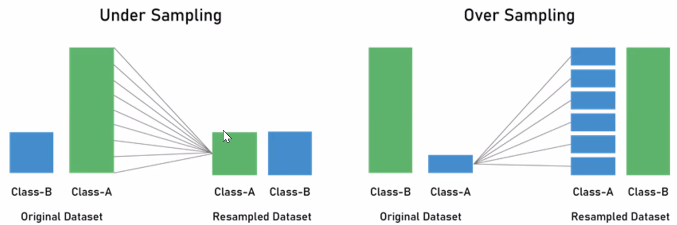

* 먼저 K 폴드 문제점 확인하고,
* 사이킷런의 Stratified K 폴드 교차 검증 방법으로 개선
* 붓꽃 데이터 세트를 DataFrame으로 생성하고
* 레이블 값의 분포도 확인

In [14]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris_df['label'].value_counts()

# 레이블 값은 0, 1, 2 값 모두 50개로 통일
# 즉, Setosa, Versicolor, virginica 각 품종 50개씩

0    50
1    50
2    50
Name: label, dtype: int64

In [21]:
# 3개 폴드를 구성

kfold = KFold(n_splits=3)

n = 0
for train_index, test_index in kfold.split(iris_df):
    n += 1
    train_label = iris_df['label'].iloc[train_index]
    test_label = iris_df['label'].iloc[test_index]
    print('교차검증: ', n)
    print('학습용: \n', train_label.value_counts())
    print('검증용: \n', test_label.value_counts())

교차검증:  1
학습용: 
 1    50
2    50
Name: label, dtype: int64
검증용: 
 0    50
Name: label, dtype: int64
교차검증:  2
학습용: 
 0    50
2    50
Name: label, dtype: int64
검증용: 
 1    50
Name: label, dtype: int64
교차검증:  3
학습용: 
 0    50
1    50
Name: label, dtype: int64
검증용: 
 2    50
Name: label, dtype: int64


In [ ]:
########## 참고 : 3개의 폴드 세트로 KFold 교차 검증 : 정확도 : 0 ###########

In [ ]:
### 혼자해보기 (답은 아래에!!)

# DecisionTreeClassifier 객체 생성 


# 3개의 폴드 세트로 분리하는 KFold 객체 생성


# 폴드 세트별 정확도를 담을 리스트 객체 생성 후
# 폴드 세트별 학습, 예측, 정확도 계산

    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 


In [46]:
### 답

# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=56)

iris = load_iris()
X = iris.data
y = iris.target

# 3개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=3, shuffle=True)

# 폴드 세트별 정확도를 담을 리스트 객체 생성 후
# 폴드 세트별 학습, 예측, 정확도 계산
cv_acc = []

n = 1
for train_idx, test_idx in kfold.split(iris_df):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 정확도 계산
    acc = accuracy_score(y_test, pred)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print(f'교차검증{n}회')
    print(f'정확도: {acc}, 학습데이터크기: {train_size}, 검증데이터크기: {test_size}')
    n += 1
    cv_acc.append(acc)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print(f'평균정확도: {np.mean(cv_acc)}')

교차검증1회
정확도: 0.94, 학습데이터크기: 100, 검증데이터크기: 50
교차검증2회
정확도: 0.9, 학습데이터크기: 100, 검증데이터크기: 50
교차검증3회
정확도: 0.98, 학습데이터크기: 100, 검증데이터크기: 50
평균정확도: 0.94


In [ ]:
########## 참고 끝   ###########

- 위 코드 결과의 문제점
    - 학습하지 않은 데이터를 검증 데이터로 사용
    - 원할한 학습과 예측이 어려움
    - 검증 정확도는 0

StratifiedKFold 클래스


In [39]:
from sklearn.model_selection import StratifiedKFold

In [43]:
# StratifiedKFold를 이용해 붓꽃 데이터 교차 검증

# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=156)

iris = load_iris()
X = iris.data
y = iris.target

# 3개의 폴드 세트로 분리하는 StratifiedKFold 객체 생성
stkfold = StratifiedKFold(n_splits=3)

# 폴드 세트별 정확도를 담을 리스트 객체 생성 후
# 폴드 세트별 학습, 예측, 정확도 계산
cv_acc = []

for i, (train_idx, test_idx) in enumerate(stkfold.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 정확도 계산
    acc = accuracy_score(y_test, pred)
    cv_acc.append(acc)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print(f'교차검증{i+1}회')
    print(f'정확도: {acc}, 학습데이터크기: {train_size}, 검증데이터크기: {test_size}')
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print(f'평균정확도: {np.mean(cv_acc)}')

교차검증1회
정확도: 0.98, 학습데이터크기: 100, 검증데이터크기: 50
교차검증2회
정확도: 0.94, 학습데이터크기: 100, 검증데이터크기: 50
교차검증3회
정확도: 0.98, 학습데이터크기: 100, 검증데이터크기: 50
평균정확도: 0.9666666666666667


Stratified K 폴드의 경우

* 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있음
* 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해서 교차 검증해야 함
* 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할되어야 함

* 회귀(Regression)에서는 Stratified K 폴드 지원되지 않음
    * 이유: 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 떄문에
    * 결정값별로 분포를 정하는 의미가 없기 때문

## 교차검증을 보다 간편하게 

* 교차 검증 (Cross Validation) 과정
    1. 폴드 세트 설정
    2. for 문에서 반복적으로 학습 및 검증 데이터 추출 및 학습과 예측 수행
    3. 폴드 세트별로 예측 성능을 평균하여 최종 성능 평가

### cross_val_score( ) 함수

* 1~3 단계의 교차 검증 과정을 한꺼번에 수행
* 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation) 시켜주므로
* 간단하게 교차 검증 수행 가능

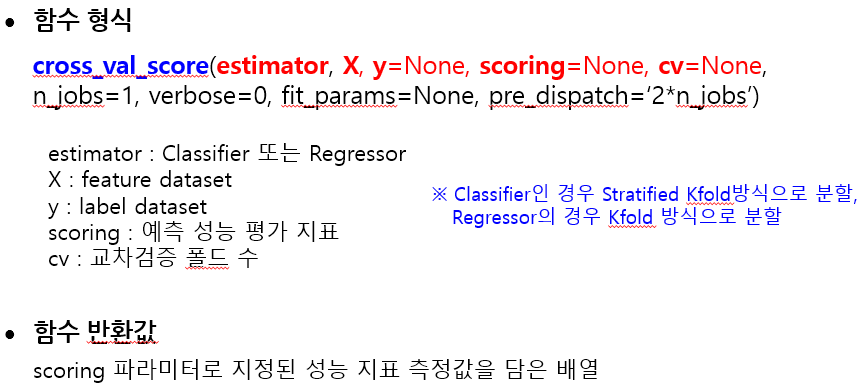

### 붓꽃 자료를 3개 폴드로 분할하여 학습 및 검증

In [48]:
from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

X = iris.data
y = iris.target

score = cross_val_score(dt_clf, X, y, scoring = 'accuracy', cv=3)
print(f'교차 검증별 정확도: {score}')
print(f'평균정확도: {np.mean(score)}')

교차 검증별 정확도: [0.98 0.94 0.98]
평균정확도: 0.9666666666666667


* cross_val_score()는 cv로 지정된 횟수만큼 
* scoring 파라미터로 지정된 평가 지표로 평가 결과값을 배열로 반환
* 일반적으로 평가 결과값 평균을 평가 수치로 사용

## 교차 검증과 최적의 하이퍼파라미터 튜닝을 한번에

하이퍼파라미터(Hyper parameter)
* 머신러닝 알고리즘을 구성하는 요소
* 이 값들을 조정해 알고리즘의 예측 성능을 개선할 수 있음

### 사이킷런의 GridSearchCV클래스

- Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터를 편리하게 도출할 수 있는 방법 제공 (Grid는 격자라는 의미 : 촘촘하게 파라미터를 입력하면서 테스트하는 방식)


- 즉, 머신러닝 알고리즘의 여러 하이퍼 파라미터들


- 순차적으로 변경하면서 최고 성능을 가지는 파라미터를 찾고자 한다면, 파라미터의 집합을 만들어 순차적으로 적용하면서 최적화 수행

**GridSearchCV 클래스 생성자의 주요 파라미터**

- estimator : classifier, regressor, peipeline


- param_grid : key + 리스트 값을 가지는 딕셔너리 (estimator 튜닝을 위한 하이퍼 파라미터 )
     - key: 파라미터명, 리스트값:파라미터 값
     
     
- scoring : 예측 성능을 측정할 평가 방법 
     - 성능 평가 지표를 지정하는 문자열
     - 예: 정확도인 경우 'accuracy'
     
     
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수


- refit : 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 여부
     - 디폴트 : True    


In [58]:
# GridSearchCV를 이용해
# 결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용해서
# 붓꽃 데이터 예측 분석

from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

dt_clf = DecisionTreeClassifier()

params = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

# 하이퍼파라미터는 딕셔너리 형식으로 지정
# key : 결정트리는 하이퍼파라미터
# value : 하이퍼파라미터의 값

min_samples_split : 자식 규칙 노드를 분할해서 만드는데 필요한 최소 샘플 데이터 개수
- min_samples_split=4로 설정하는 경우
    - 최소 샘플 개수가 4개 필요한데
    - 3개만 있는 경우에는 더 이상 자식 규칙 노드를 위한 분할을 하지 않음


트리 깊이도 줄어서 더 간결한 결정 트리 생성


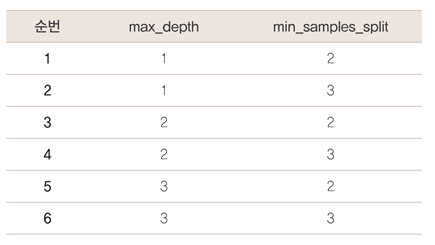

In [60]:
# 
grid_tree = GridSearchCV(dt_clf, param_grid = params, cv=3, refit=True, return_train_score = True)
grid_tree.fit(X_train, y_train)

# scores = grid_tree.cv_results_
# scores

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.006215,0.002925,0.001519,0.000458,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.675,0.700,0.700,0.691667,0.011785,5,0.700,0.6875,0.6875,0.691667,0.005893
1,0.006586,0.003597,0.004037,0.002205,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.675,0.700,0.700,0.691667,0.011785,5,0.700,0.6875,0.6875,0.691667,0.005893
2,0.005630,0.001480,0.006982,0.006544,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,0.950,0.900,0.925000,0.020412,3,0.975,0.9500,0.9625,0.962500,0.010206
3,0.003390,0.001240,0.004496,0.002279,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,0.950,0.900,0.925000,0.020412,3,0.975,0.9500,0.9625,0.962500,0.010206
4,0.009533,0.006097,0.007826,0.006484,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.925,0.975,0.975,0.958333,0.023570,1,0.975,0.9625,0.9750,0.970833,0.005893
5,0.004933,0.003529,0.001068,0.000022,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.925,0.975,0.975,0.958333,0.023570,1,0.975,0.9625,0.9750,0.970833,0.005893


In [63]:
# 파라미터 확인
grid_tree.cv_results_

{'mean_fit_time': array([0.00621525, 0.00658576, 0.00562994, 0.00338991, 0.00953285,
        0.00493312]),
 'std_fit_time': array([0.00292523, 0.00359697, 0.00147977, 0.00124045, 0.00609724,
        0.003529  ]),
 'mean_score_time': array([0.00151881, 0.00403746, 0.00698209, 0.00449594, 0.00782569,
        0.00106764]),
 'std_score_time': array([4.57845386e-04, 2.20465468e-03, 6.54354091e-03, 2.27900120e-03,
        6.48417980e-03, 2.24442950e-05]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'ma

In [64]:
# GridSearchCV 결과 세트로 딕셔너리 형태인 cv_results_ 를 
# DataFrame으로 변환 후 # 일부 파라미터 확인
grid_tree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [68]:
grid_tree.best_score_

0.9583333333333334

In [69]:
# 최고 성능을 가지는 파라미터 조합 및 예측 성능 1위 값 출력
best_dt = grid_tree.best_estimator_

# best_params_: 최고 점수를 낸 파라미터
# best_estimator_: 최고 점수를 낸 파라미터를 가진 모형

In [70]:
# GridSearchCV 객체의 생성 파라미터로 refit=True로 설정된 경우(디폴트)
# GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습하고 best_estimator_로 저장
# (GridSearchCV의 refit으로 이미 학습이 된 estimator)

# (best_estimator_는 이미 최적 학습이 되었으므로, 별도 학습 필요없이 바로 예측 가능)

pred = best_dt.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

**일반적인 머신러닝 모델 적용 방법**

- 일반적으로 학습 데이터를 GridSearchCV를 이용해
- 최적 하이퍼 파라미터 튜닝을 수행한 뒤에
- 별도의 테스트 세트에서 이를 평가하는 방식